[Text(0,0,'point 1'), Text(0,0,'point 2')]

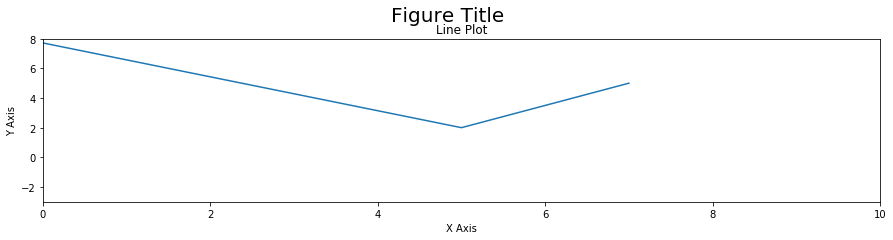

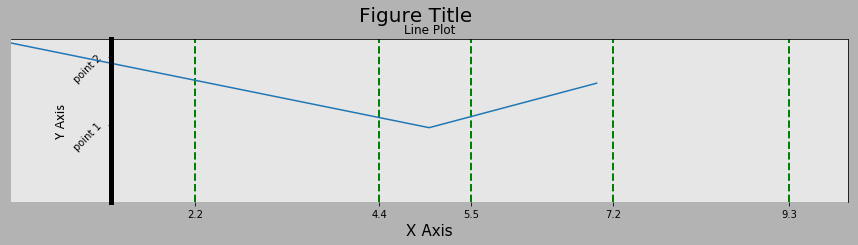

In [5]:
#Stable method
https://github.com/lazyprogrammer/machine_learning_examples/blob/master/linear_regression_class/data_1d.csvimport matplotlib.pyplot as plt
x=[-2,5,7]
y=[10,2,5]

plt.figure(figsize=(15,3))
plt.plot(x,y)
plt.xlim(0,10)
plt.ylim(-3,8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('Figure Title',size=20,y=1.03)

#The object-oriented approach, but typically, it is only to create the Figure and Axes objects druing the 1st step
fig,ax=plt.subplots(figsize=(15,3))
ax.plot(x,y)
ax.set_xlim(0,10)
ax.set_ylim(-3,8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title',size=20,y=1.03)
fig.set_facecolor('.7')
ax.set_facecolor('.9')

fig.get_size_inches() #fig.set_size_inches(14,4)

ax_children=ax.get_children()
ax_children
spines=ax.spines
spines
spine_left=spines['left']
spine_left.set_position(('outward',-100))
spine_left.set_linewidth(5)

spine_bottom=spines['bottom']
spine_bottom.set_visible(False)

ax.xaxis.grid(True,which='major',linewidth=2,color='green',linestyle='--')
ax.xaxis.set_ticks([2.2,4.4,5.5,7.2,9.3])
ax.xaxis.set_label_text('X Axis',family='Verdana',fontsize=15)

ax.yaxis.set_label_text('Y Axis',family='Calibri',fontsize=15)
ax.set_yticks([2.2,6.8])
ax.set_yticklabels(['point 1','point 2'],rotation=45)

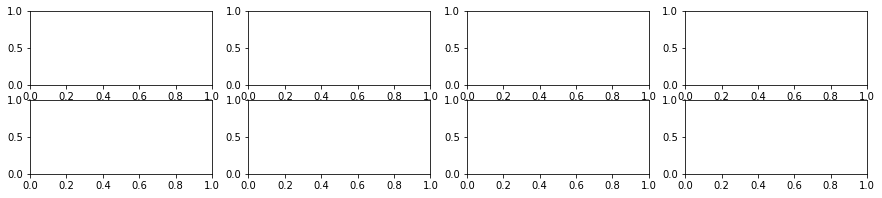

In [2]:
#..mutiple plots
plot_objects=plt.subplots(nrows=2,ncols=4,figsize=(15,3))
fig=plot_objects[1]
ax=plot_objects[1]

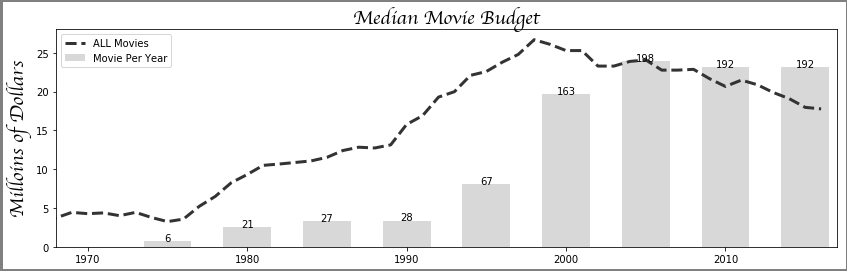

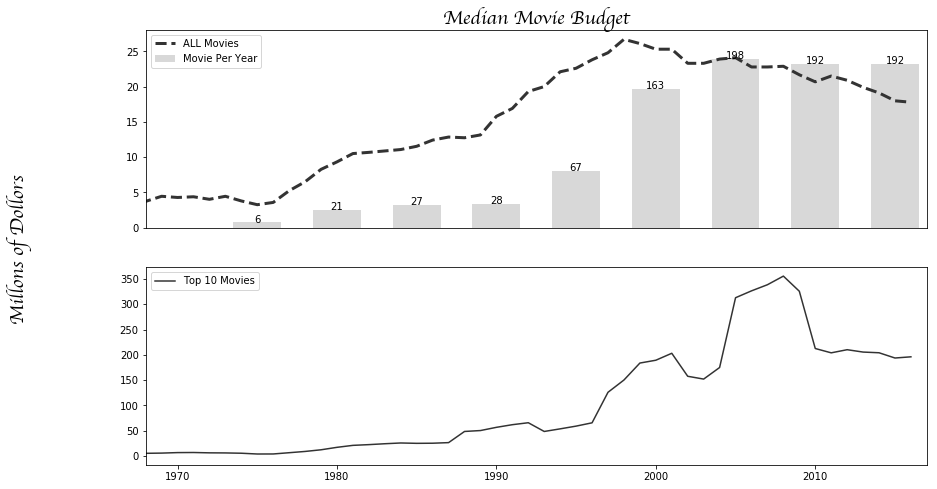

In [17]:
#Visualizating data wtih matplotlib
import pandas as pd
import matplotlib.pyplot as plt
movie=pd.read_csv('data/movie.csv')
med_budget=(movie.groupby('title_year')['budget'].median()/1e6)
med_budget_roll=med_budget.rolling(5,min_periods=1).mean()
med_budget_roll.tail()
#let's get our data in NumPy arrays
years=med_budget_roll.index.values
budget=med_budget_roll.values

fig,ax=plt.subplots(figsize=(14,4),linewidth=5,edgecolor='0.5')
ax.plot(years,budget,linestyle='--',linewidth=3,color='0.2',label='ALL Movies')

text_kwargs=dict(fontsize=20,family='cursive')

ax.set_title('Median Movie Budget',**text_kwargs)
ax.set_ylabel('Milloins of Dollars',**text_kwargs)

#check number of mvies each years
movie_count=movie.groupby('title_year')['budget'].count()
ct=movie_count.values
ct_norm=ct/ct.max()*budget.max()

fifth_year=(years%5==0)&(years>1970) #get mood
years_5=years[fifth_year]
ct_5=ct[fifth_year]
ct_norm_5=ct_norm[fifth_year]


ax.bar(x=years_5,height=ct_norm_5,width=3,facecolor='.5',alpha=.3,label='Movie Per Year')
ax.set_xlim(1968,2017)
for x,y,v in zip(years_5,ct_norm_5,ct_5):
    ax.text(x,y,str(v),ha='center')
ax.legend()

top10=movie.sort_values('budget',ascending=False).groupby('title_year')['budget']\
     .apply(lambda x: x.iloc[:10].mean()/1e6)
top10_rolling=top10.rolling(5,min_periods=1).mean()

fig2,ax_array=plt.subplots(2,1,figsize=(14,8),sharex=True)
ax1=ax_array[0]
ax2=ax_array[1]

ax1.plot(years,budget,linestyle='--',linewidth=3,color='.2',label='ALL Movies')
ax1.bar(years_5,ct_norm_5,width=3,facecolor='.5',alpha=.3,label='Movie Per Year')
ax1.legend(loc='upper left')
ax1.set_xlim(1968,2017)
plt.setp(ax1.get_xticklines(),visible=False)
#把第一个图的下一个刻度给remove掉
ax1.set_title('Median Movie Budget',**text_kwargs)
for x,y,v in zip(years_5,ct_norm_5,ct_5):
    ax1.text(x,y,str(v),ha='center')
    
ax2.plot(years,top10_rolling.values,color='.2',label='Top 10 Movies')
ax2.legend(loc='upper left')

#fig2.tight_layout()
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html
fig2.text(0,0.6,'Millons of Dollors',rotation='vertical',ha='center',**text_kwargs)

import os
path=os.path.expanduser('~/Desktop/movie_budge.png')
fig2.savefig(path,bbox_inches='tight')

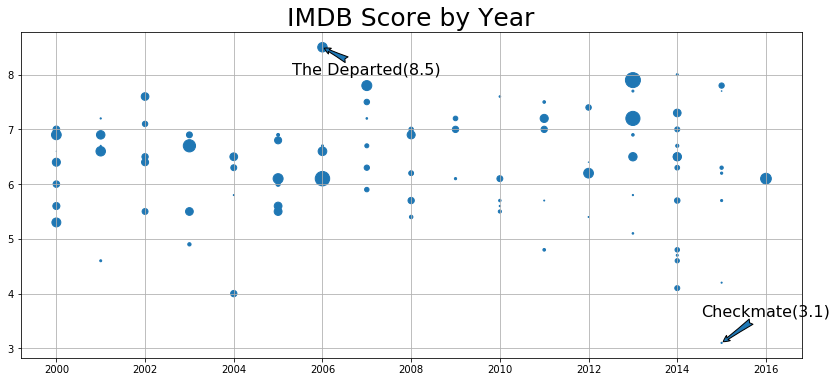

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
movie=pd.read_csv('data/movie.csv')
cols=['budget','title_year','imdb_score','movie_title']
m=movie[cols].dropna()
m['budget2']=m['budget']/1e6
np.random.seed(0)
movie_samp=m.query('title_year>=2000').sample(100).reset_index(drop=True)

fig, ax=plt.subplots(figsize=(14,6))
ax.scatter(x='title_year',y='imdb_score',s='budget2',data=movie_samp)

idx_min=movie_samp['imdb_score'].idxmin()
#Return index of first occurrence of minimum over requested axis
idx_max=movie_samp['imdb_score'].idxmax()

for idx, offset in zip([idx_min,idx_max],[0.5,-0.5]):
    year=movie_samp.loc[idx,'title_year']
    score=movie_samp.loc[idx,'imdb_score']
    title=movie_samp.loc[idx,'movie_title']
    ax.annotate(xy=(year,score),xytext=(year+1,score+offset),
    s=title+'({})'.format(score),
    ha='center',
    size=16,
    arrowprops=dict(arrowstyle="fancy"))
    
ax.set_title('IMDB Score by Year',size=25)
ax.grid(True)

,Apple,Orange
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


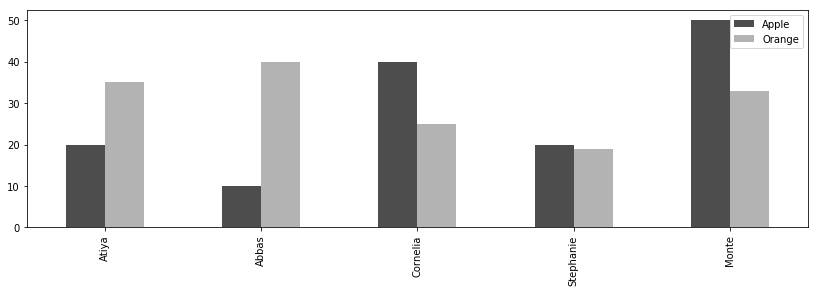

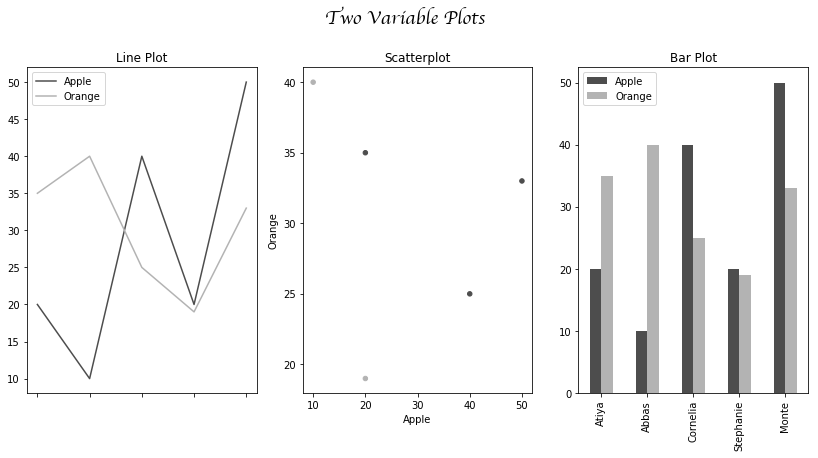

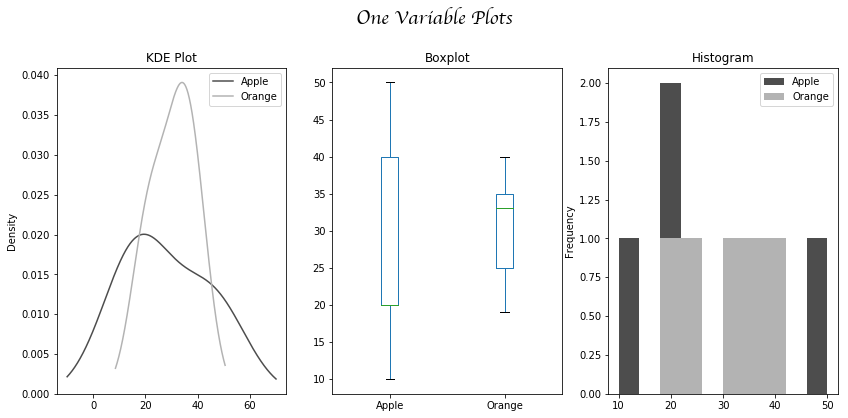

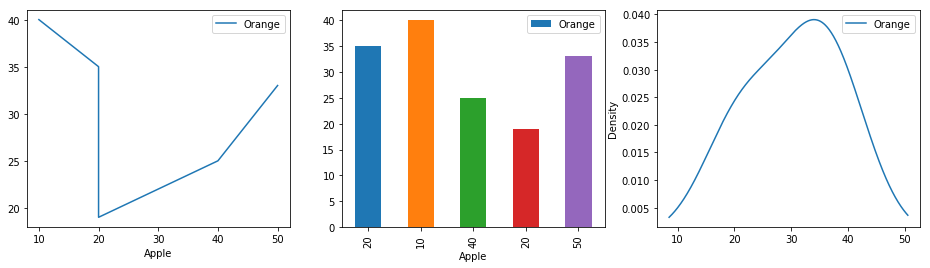

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame(index=['Atiya','Abbas','Cornelia','Stephanie','Monte'],
               data={'Apple':[20,10,40,20,50],
                     'Orange':[35,40,25,19,33]})

color=['0.3','0.7']
df.plot(kind='bar',color=color,figsize=(14,4))

#One Varible
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(14,6))
fig.suptitle('Two Variable Plots',size=20,y=1.02,family='cursive')
df.plot(kind='line',color=color,ax=ax1,title='Line Plot')
df.plot(x='Apple',y='Orange',kind='Scatter',color=color,ax=ax2,title='Scatterplot')
df.plot(kind='bar',color=color,ax=ax3,title='Bar Plot')

#Two Varible
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(14,6))
fig.suptitle('One Variable Plots',size=20,y=1.02,family='cursive')
df.plot(kind='kde',color=color,ax=ax1,title='KDE Plot')
df.plot(kind='box',ax=ax2,title='Boxplot')
df.plot(kind='hist',color=color,ax=ax3,title='Histogram')


#specfic column
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
df.sort_values('Apple').plot(x='Apple',y='Orange',kind='line',ax=ax1)
df.plot(x='Apple',y='Orange',kind='bar',ax=ax2)
df.plot(x='Apple',kind='kde',ax=ax3)
df

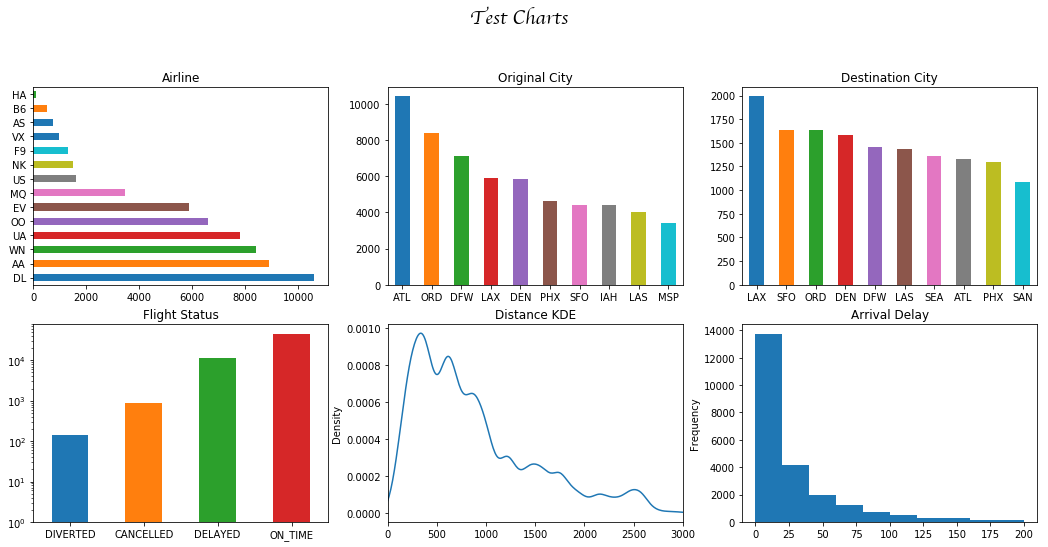

In [74]:
#Visualzing the flights dataset
import pandas as pd
import matplotlib.pyplot as plt
flights=pd.read_csv('data/flights.csv')
flights

#>15 mins or more consider as delay
flights['DELAYED']=flights['ARR_DELAY'].ge(15).astype(int)

#pandas.DataFrame.any Return whether any element is True over requested axis.
cols=['DIVERTED','CANCELLED','DELAYED']
flights['ON_TIME']=1-flights[cols].any(axis=1)
cols.append('ON_TIME')

status=flights[cols].sum()
status

#make plot on same Figure
fig,axe=plt.subplots(2,3,figsize=(18,8))
fig.suptitle('Test Charts',size=20,y=1.02,family='cursive')
#(ax1,ax2,ax3),(ax4,ax5,ax6)=axe

ac=flights['AIRLINE'].value_counts()
ac.plot(kind='barh',ax=axe[0,0],title='Airline')

oc=flights['ORG_AIR'].value_counts()
oc.plot(kind='bar',ax=axe[0,1],rot=0,title='Original City')
#rot : int, default None
#Rotation for ticks (xticks for vertical, yticks for horizontal plots)

dc=flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar',ax=axe[0,2],rot=0,title='Destination City')

status.plot(kind='bar',ax=axe[1,0],rot=0,log=True,title='Flight Status')

flights['DIST'].plot(kind='kde',ax=axe[1,1],title='Distance KDE',xlim=(0,3000))

flights['ARR_DELAY'].plot(kind='hist',ax=axe[1,2],title='Arrival Delay',range=(0,200))

Text(0.5,1,'Flights Per Week (Interpolated Missing Data)')

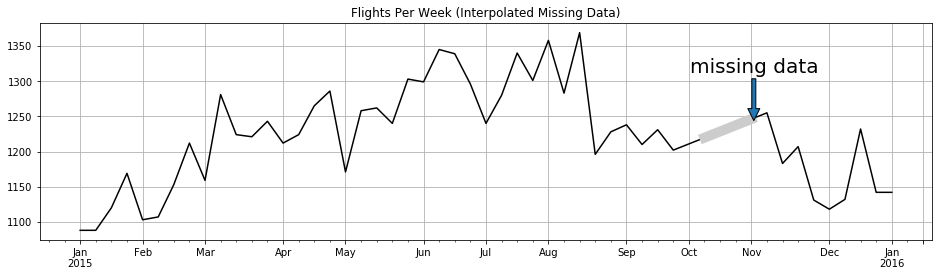

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
flights=pd.read_csv('data/flights.csv')
hour=flights['SCHED_DEP']//100
minutes=flights['SCHED_DEP']%100
df_date=flights[['MONTH','DAY']].assign(YEAR=2015,HOUR=hour,MINUTES=minutes)


fligt_dep=pd.to_datetime(df_date)
fligt_dep.head()

#Use the datetime as NewIndex
flights.index=fligt_dep
fc=flights.resample('W').size()
#fc.plot(figsize=(12,3),title='Flights per Week',grid=True,ylim=(1000))

fc_miss=fc.where(fc>1000)
fc_intp=fc_miss.interpolate(limit_direction='both')
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.interpolate.html

ax=fc_intp.plot(color='black',figsize=(16,4))
fc_intp[fc<500].plot(linewidth=10,grid=True,color='.8',ax=ax)

ax.annotate(xy=(.8,.55),xytext=(.8,.77),xycoords='axes fraction',s='missing data',ha='center',size=20,arrowprops=dict())

ax.set_title('Flights Per Week (Interpolated Missing Data)')



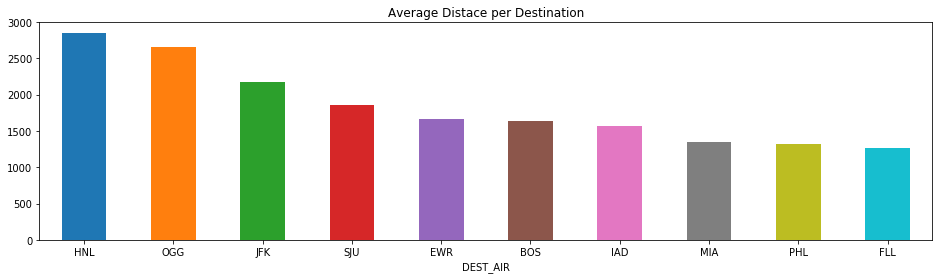

In [96]:
#Let find 10 that 1. have the longest average distance traveled for inbound fights 2. have a minimun of 100 total flight

import pandas as pd
import matplotlib.pyplot as plt
flights=pd.read_csv('data/flights.csv')

flights.groupby('DEST_AIR')['DIST'].agg(['mean','count']).query('count>100').sort_values('mean',ascending=False)\
.head(10).plot(kind='bar',y='mean',rot=0,legend=False,title='Average Distace per Destination',figsize=(16,4))



Text(0.5,1,'Test Test Test')

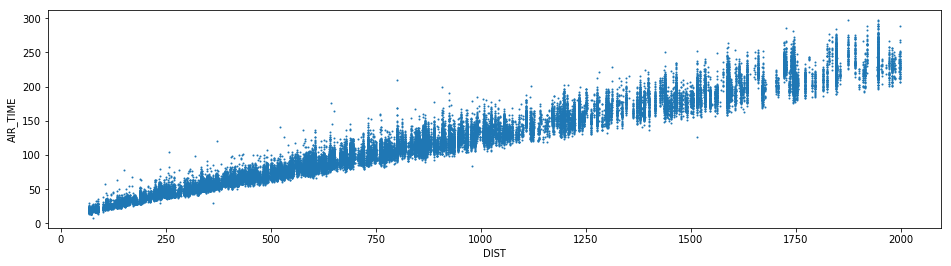

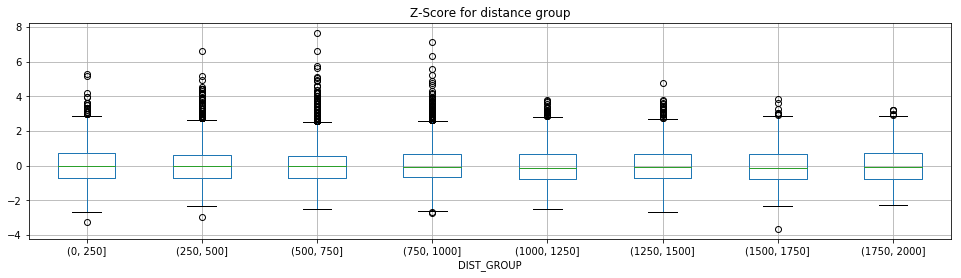

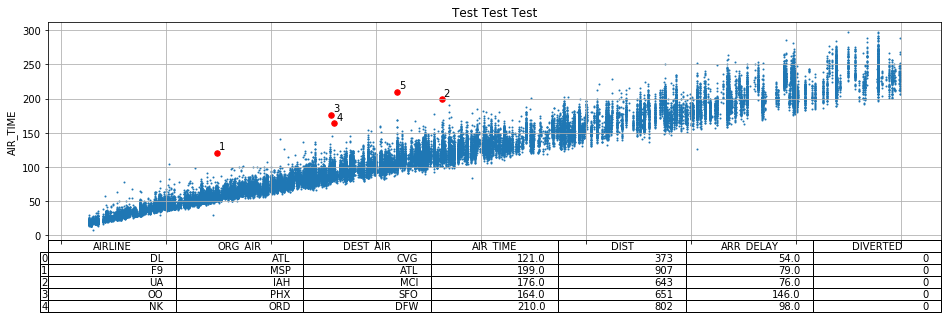

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
flights=pd.read_csv('data/flights.csv')

#Two variables at the same time by making a scatter plot between distance and airtime for all fights under 2000 miles
#fs=flights.reset_index(drop=True)
#fd=flights[['DIST','AIR_TIME']][['DIST','AIR_TIME']].query('DIST<=2000').isnull().any().any()
fd=flights[['DIST','AIR_TIME']][['DIST','AIR_TIME']].query('DIST<=2000').dropna()
fd.plot(x='DIST',y='AIR_TIME',kind='scatter',figsize=(16,4),s=1)

fd['DIST_GROUP']=pd.cut(fd['DIST'],bins=range(0,2001,250))
fd['DIST_GROUP'].value_counts().sort_index()

#caculate for each flight the number of standard deviations if the flight time deviates from the mean of each group
normalize=lambda x: (x-x.mean())/x.std()
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transform.html
fd['TIME_SCORE']=fd.groupby('DIST_GROUP')['AIR_TIME'].transform(normalize)

#need a way to discover the ourliers
ax=fd.boxplot(by='DIST_GROUP',column='TIME_SCORE',figsize=(16,4))
ax.set_title('Z-Score for distance group')
ax.figure.suptitle('')

outlier=flights.iloc[fd[fd['TIME_SCORE']>6].index]
outlier=outlier[['AIRLINE','ORG_AIR','DEST_AIR','AIR_TIME','DIST','ARR_DELAY','DIVERTED']].reset_index(drop=True)

#attach the outlier table to identify the outliers on the plot


ax1=fd.plot(x='DIST',y='AIR_TIME',kind='scatter',figsize=(16,4),s=1,table=outlier)
outlier.plot(x='DIST',y='AIR_TIME',kind='scatter',s=30,ax=ax1,grid=True,color='red')
out=outlier[['AIR_TIME','DIST']]

#要以 Pandas 的方式迭代遍历DataFrame的行，可以使用
# i means index
for i,t,d in out.itertuples():
    ax1.text(d+5,t+5,str(i+1))
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.setp.html
plt.setp(ax1.get_xticklabels(),visible=False)
ax1.set_xlabel('')
ax1.set_title('Test Test Test')

Text(0.75,0.1,'Machine Learning')

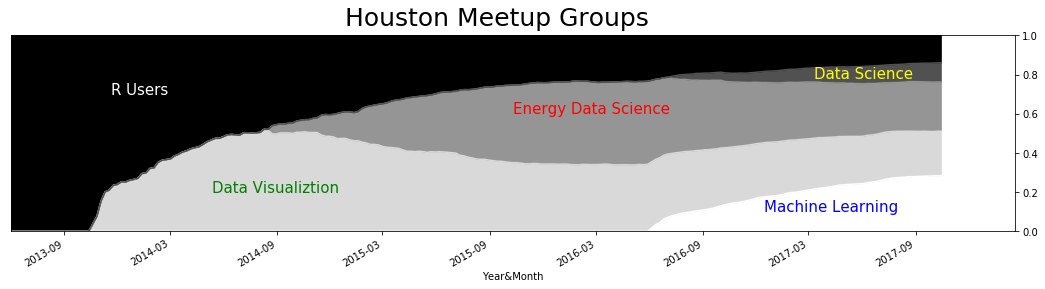

In [45]:
#Stacking area charts to discover emerging trends
import pandas as pd
meetup=pd.read_csv('data/meetup_groups.csv',parse_dates=['join_date'],index_col='join_date')
meetup.head()
#each group each week
group_count=meetup.groupby([pd.Grouper(freq='W'),'group']).size()
group_count.unstack('group',fill_value=0)
group_total=group_count.unstack('group',fill_value=0).cumsum()
row_total=group_total.sum(axis='columns')
group_cum_pct=group_total.div(row_total,axis='index')

#now we can create our stacked area plot
ax=group_cum_pct.plot(kind='area',figsize=(18,4),cmap='Greys',xlim=('2013-6',None),ylim=(0,1),legend=False)
ax.figure.suptitle('Houston Meetup Groups',size=25)
ax.set_xlabel('Year&Month')
ax.yaxis.tick_right()

plot_kwargs=dict(xycoords='axes fraction',size=15)

ax.annotate(xy=(.1,.7),s='R Users',color='white',**plot_kwargs)
ax.annotate(xy=(.2,.2),s='Data Visualiztion',color='green',**plot_kwargs)
ax.annotate(xy=(.5,.6),s='Energy Data Science',color='red',**plot_kwargs)
ax.annotate(xy=(.8,.78),s='Data Science',color='yellow',**plot_kwargs)
ax.annotate(xy=(.75,.1),s='Machine Learning',color='blue',**plot_kwargs)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


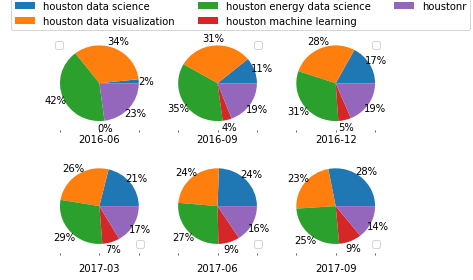

In [59]:
#Pie charts to discover emerging trends
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
meetup=pd.read_csv('data/meetup_groups.csv',parse_dates=['join_date'],index_col='join_date')
meetup.head()
#each group each week
group_count=meetup.groupby([pd.Grouper(freq='W'),'group']).size()
group_count.unstack('group',fill_value=0)
group_total=group_count.unstack('group',fill_value=0).cumsum()
row_total=group_total.sum(axis='columns')
group_cum_pct=group_total.div(row_total,axis='index').asfreq('3MS',method='bfill')
#把时间转化成没3个月的开头，如果没有就去找最先一个有data的在这下3个月里面的日子，用row来当成这个月初的数据
pie_data=group_cum_pct.tail(6).to_period('M').T
#T指的是把row和column对换

#From here we can use the plot method to create the pie chart
from matplotlib.cm import Greys
grey=Greys(np.arange(50,250,40))

ax_array=pie_data.plot(kind='pie',subplots=True,layout=(2,3),labels=None,autopct='%1.0f%%',pctdistance=1.2)
#autopct 用于标记它们的值(大小为x/sum(x)*100
#pctdistance: scalar ，用于控制上面的那个autopct生成的显示的值 的位置，默认离每一块的中心0.6的比例处；

ax1=ax_array[0,0]
ax1.figure.legend(ax1.patches,pie_data.index,ncol=3,bbox_to_anchor=(1.1, 1))

for ax in ax_array.flatten():
    ax.xaxis.label.set_visible(True)
    ax.set_xlabel(ax.get_ylabel())
    ax.set_ylabel('')
#a是个矩阵或者数组，a.flatten()就是把a降到一维，默认是按横的方向降

ax1.figure.subplots_adjust(hspace=0.3)

#pos1 = ax1.get_position() # get the original position 
#pos2 = [pos1.x0, pos1.y0 -0.1,  pos1.width, pos1.height] 
#ax1.set_position(pos2)

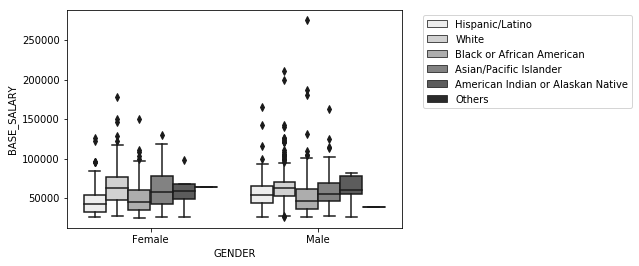

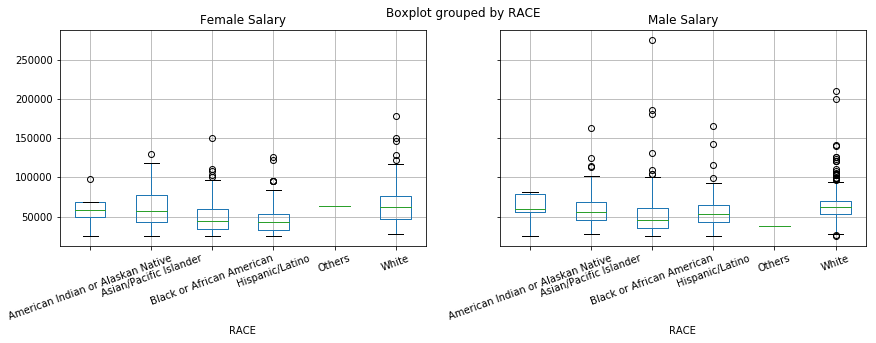

In [71]:
#Differences between seaborn and pandas

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
employee=pd.read_csv('data/employee.csv',parse_dates=['HIRE_DATE','JOB_DATE'])
#sns.countplot(y='DEPARTMENT',data=employee)

#如果用pandas的话，we need to aggregate the data beforehand
#employee['DEPARTMENT'].value_counts().plot('barh')


#find avarage salary for each race with seaborn
#ax=sns.barplot(x='RACE',y='BASE_SALARY',data=employee)
#ax.figure.set_size_inches(16,4)

#if we use pandas we shoud group by each race first

#avg_sal=employee.groupby('RACE',sort=False)['BASE_SALARY'].mean()
#ax=avg_sal.plot(kind='bar',figsize=(16,4),width=0.8,rot=0)
#ax.set_ylabel('Mean Salary')

#Seaborn has the ability to distinguish the groups with the data through a third variable: hue
#ax=sns.barplot(x='RACE',y='BASE_SALARY',hue='GENDER',data=employee, palette='Green')
#ax.figure.set_size_inches(16,4)

#with pandas you have to groupby race and gender, then unstack the genders as column name

#x=employee.groupby(['RACE','GENDER'],sort=False)['BASE_SALARY'].mean().unstack('GENDER')
#x.plot(kind='bar',figsize=(16,4),rot=0,width=0.8,color=['red','green'])

#A box plot is another type of plot that seaborn and pandas have in common
sns.boxplot(x='GENDER',y='BASE_SALARY',data=employee,hue='RACE',palette='Greys')
ax.figure.set_size_inches(14,4)
plt.legend(bbox_to_anchor=(1.05, 1))

#Pandas is not easy for creating a boxpotm and it can create two axe fro gender and then make box plot of salary by race
fig,ax_array=plt.subplots(1,2,figsize=(14,4),sharey=True)
for g,ax in zip(['Female','Male'],ax_array):
    employee.query('GENDER==@g').boxplot(by='RACE',column='BASE_SALARY',ax=ax,rot=20)
    ax.set_title(g +' Salary')

#print(list(zip(['Female','Male'],ax_array)))

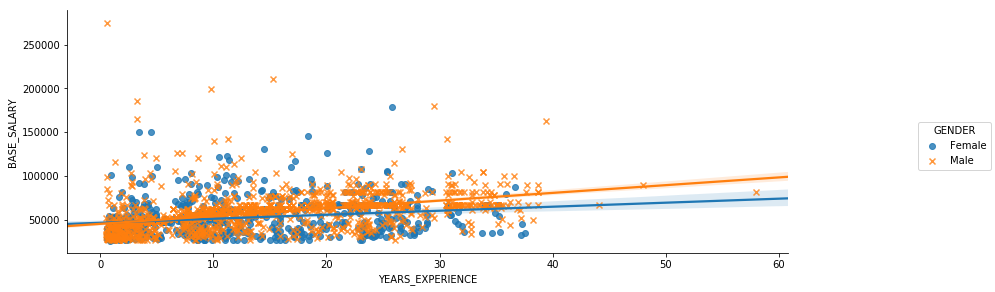

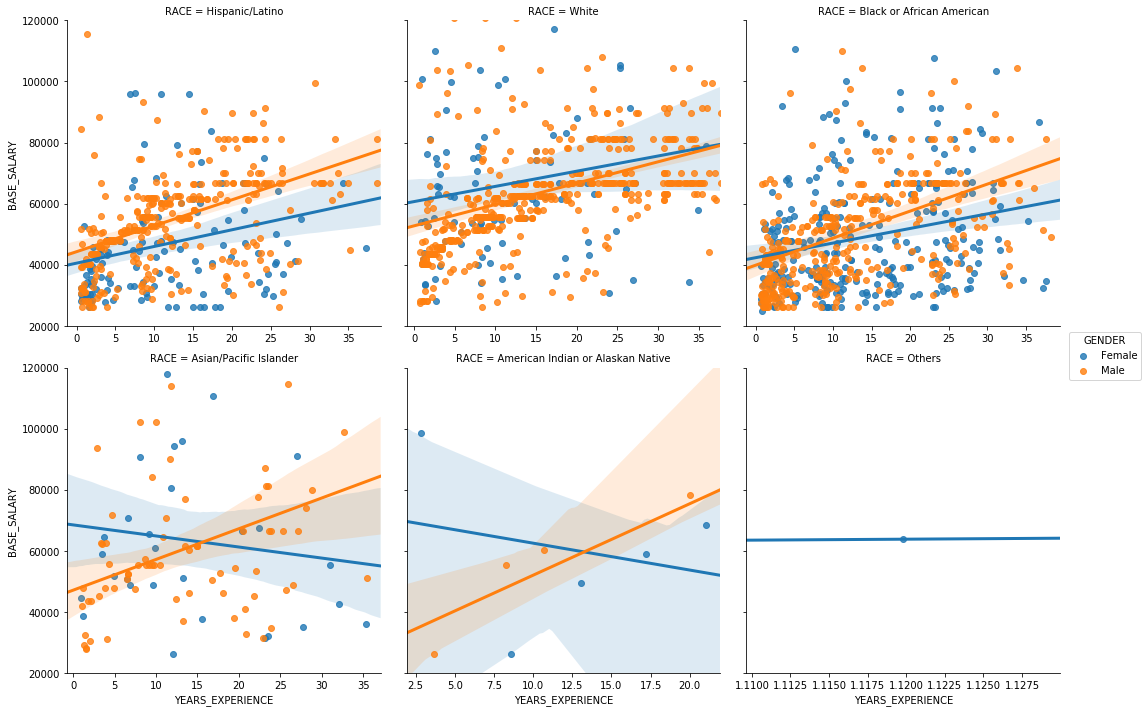

In [18]:
#Doing multivaiate analysis with seaborn Grids
import seaborn as sns
import pandas as pd
employee=pd.read_csv('data/employee.csv',parse_dates=['HIRE_DATE','JOB_DATE'])
days_hired=pd.to_datetime('12-1-2016')-employee['HIRE_DATE']

one_year=pd.Timedelta(1,unit='Y')

employee['YEARS_EXPERIENCE']=days_hired/one_year
employee[['HIRE_DATE','YEARS_EXPERIENCE']].head()

#ax=sns.regplot(x='YEARS_EXPERIENCE',y='BASE_SALARY',data=employee)
#ax.figure.set_size_inches(14,4)

g=sns.lmplot('YEARS_EXPERIENCE','BASE_SALARY',hue='GENDER',data=employee,markers=["o", "x"],scatter={'s':10}) #FacetGrid
g.fig.set_size_inches(16,4)
type(g)


grid=sns.lmplot(x='YEARS_EXPERIENCE',y='BASE_SALARY',hue='GENDER',col='RACE',col_wrap=3,\
               sharex=False,data=employee,line_kws={'linewidth':3})
grid.set(ylim=(20000,120000))

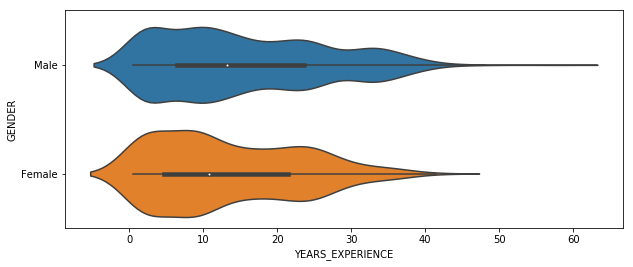

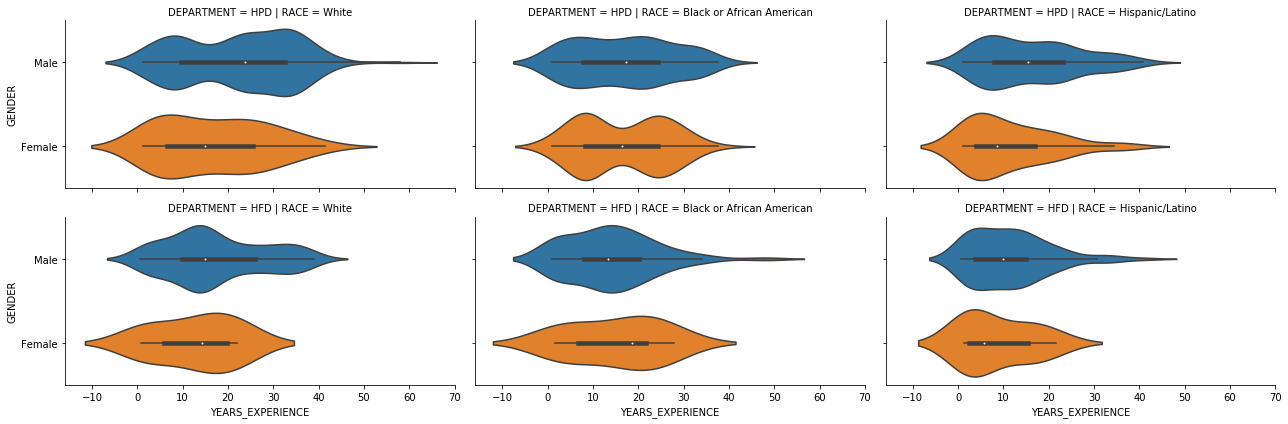

In [41]:
import seaborn as sns
import pandas as pd
employee=pd.read_csv('data/employee.csv',parse_dates=['HIRE_DATE','JOB_DATE'])
days_hired=pd.to_datetime('12-1-2016')-employee['HIRE_DATE']

one_year=pd.Timedelta(1,unit='Y')

employee['YEARS_EXPERIENCE']=days_hired/one_year

deps=employee['DEPARTMENT'].value_counts().index[:2]
races=employee['RACE'].value_counts().index[:3]
is_dep=employee['DEPARTMENT'].isin(deps)
is_race=employee['RACE'].isin(races)

emp2=employee[is_dep&is_race].copy()
emp2['DEPARTMENT']=emp2['DEPARTMENT'].str.extract('(HPD|HFD)',expand=True)

emp2.shape

emp2['DEPARTMENT'].value_counts()
emp2['RACE'].value_counts()

#Let's use one of the simpler Axes-level function, such as a violin plot to view the distrubution of yeas of exp by gender

common_depts=employee.groupby('DEPARTMENT').filter(lambda x:len(x)>50)

ax=sns.violinplot(x='YEARS_EXPERIENCE',y='GENDER',data=common_depts)
ax.figure.set_size_inches(10,4)


sns.factorplot(x='YEARS_EXPERIENCE',y='GENDER',col='RACE',row='DEPARTMENT',size=3,aspect=2,data=emp2,kind='violin')

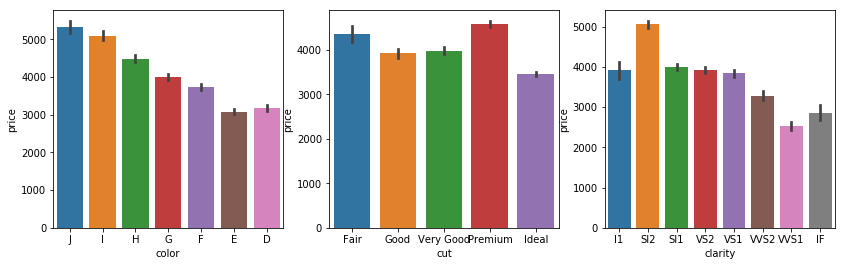

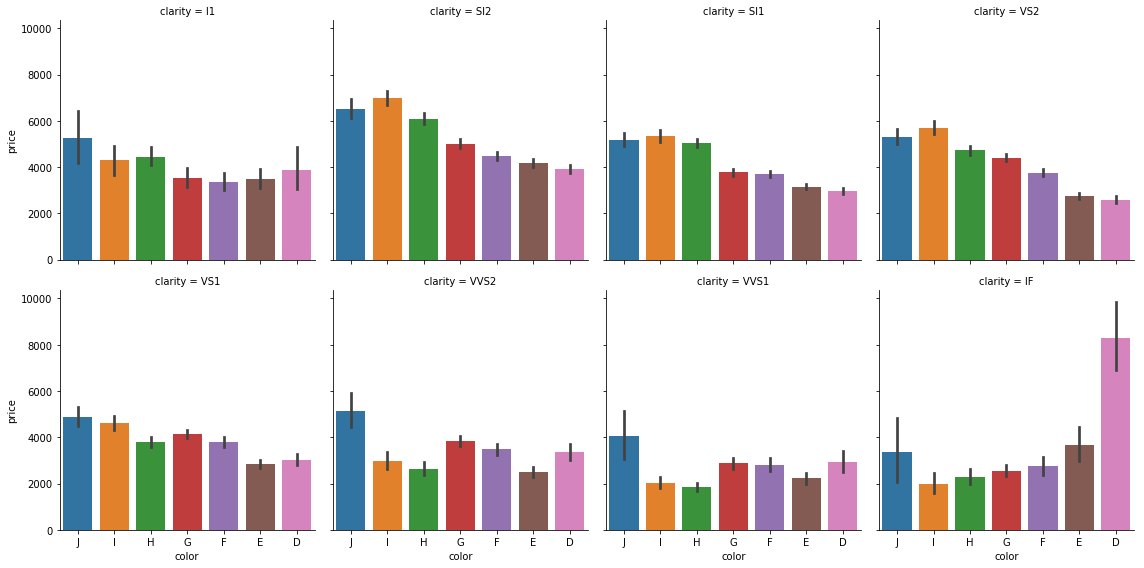

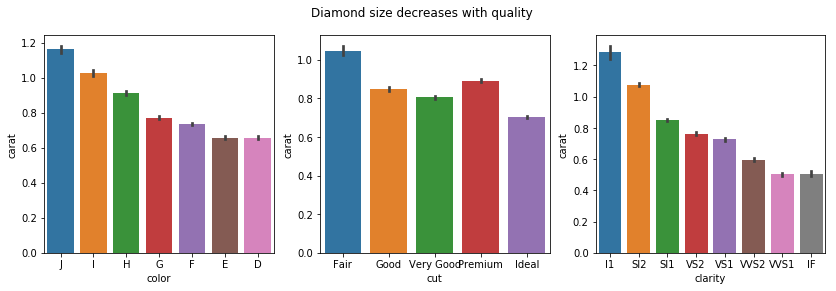

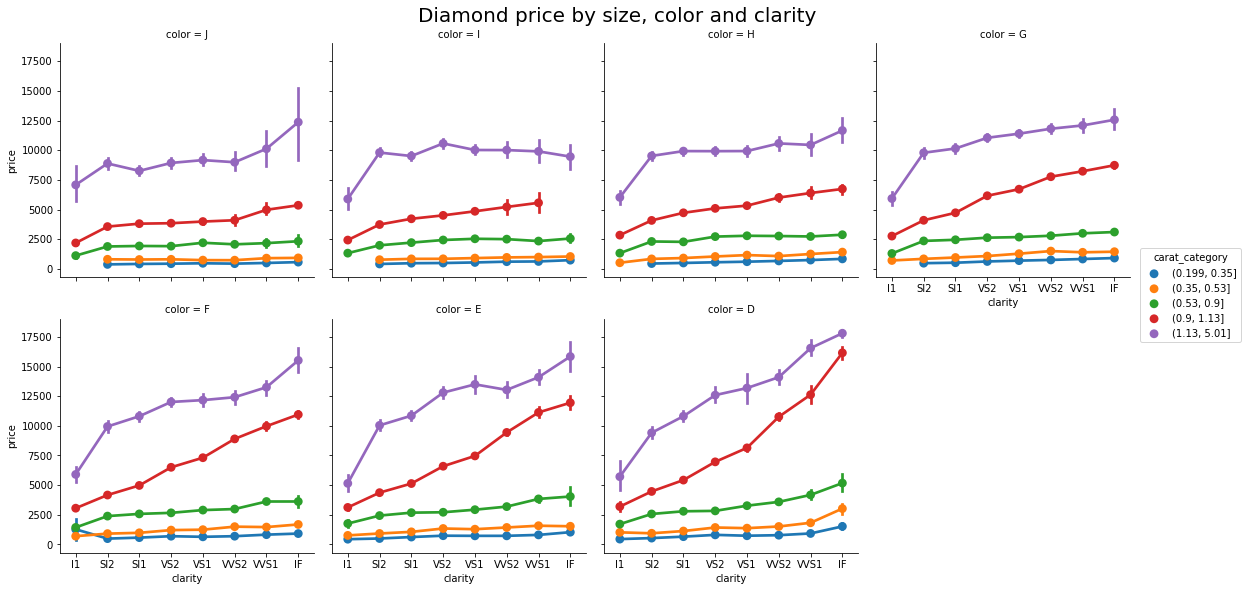

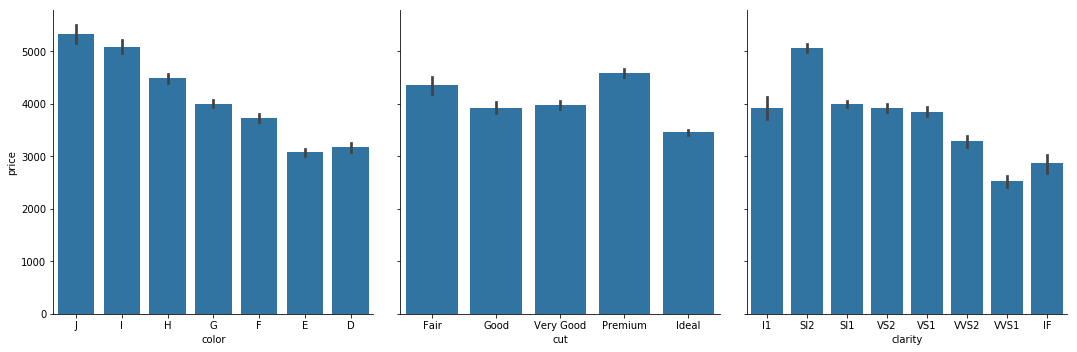

In [30]:
#Uncovering Simposon's paradox in the diamonds dataset with seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
diamonds=pd.read_csv('data/diamonds.csv')

#Before analysis, let's change the cut, color and clarity columns into ordered categorical varibles:
#开始时object
cut_cats=['Fair','Good','Very Good','Premium','Ideal']
color_cats=['J','I','H','G','F','E','D']
clarity_cats=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
diamonds['cut']=pd.Categorical(diamonds['cut'],categories=cut_cats,ordered=True) 
diamonds['color']=pd.Categorical(diamonds['color'],categories=color_cats,ordered=True) 
diamonds['clarity']=pd.Categorical(diamonds['clarity'],categories=clarity_cats,ordered=True)

#seabron uses category orders for its plots,排序的话把Object转化为Categorize
#Step 3
fig,ax_array=plt.subplots(1,3,figsize=(14,4))
sns.barplot(x='color',y='price',data=diamonds,ax=ax_array[0])
sns.barplot(x='cut',y='price',data=diamonds,ax=ax_array[1])
sns.barplot(x='clarity',y='price',data=diamonds,ax=ax_array[2])

sns.factorplot(x='color',y='price',col='clarity',col_wrap=4,data=diamonds,kind='bar')

fig1,ax1_array=plt.subplots(1,3,figsize=(14,4))
sns.barplot(x='color',y='carat',data=diamonds,ax=ax1_array[0])
sns.barplot(x='cut',y='carat',data=diamonds,ax=ax1_array[1])
sns.barplot(x='clarity',y='carat',data=diamonds,ax=ax1_array[2])
fig1.suptitle('Diamond size decreases with quality')

diamonds['carat_category']=pd.qcut(diamonds.carat,5)
g=sns.factorplot(x='clarity',y='price',data=diamonds,hue='carat_category',col='color',\
              col_wrap=4,kind='point')
g.fig.suptitle('Diamond price by size, color and clarity',y=1.02,size=20)

#Same as Step 3
g=sns.PairGrid(data=diamonds,size=5,x_vars=["color","cut","clarity"],y_vars=["price"])
g.map(sns.barplot)